In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
np.random.seed(42)

%matplotlib inline

In [2]:
# read data
data_train = pd.read_csv('WorldCupMatches.csv') 
# drop nan rows
data_train.dropna(axis=0, how='any', inplace=True)
# drop duplicate rows
data_train.drop_duplicates(inplace=True)

In [3]:
# only using the data from the Group Stage
data_train = data_train[
    data_train['Stage'].isin(
        ['Group A','Group B','Group C','Group D','Group E','Group F','Group G','Group H'])]
# only using data since 1986
data_train = data_train[data_train['Year']>=1986]
# reset the index
data_train.reset_index(inplace=True);

In [4]:
data_train['Year'].value_counts()

2014.0    48
2002.0    48
1998.0    48
2006.0    48
2010.0    48
1990.0    36
1994.0    36
1986.0    36
Name: Year, dtype: int64

In [5]:
data_train.head()

,index,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,...,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,360,1986.0,31 May 1986 - 12:00,Group A,Estadio Azteca,Mexico City,Bulgaria,1.0,1.0,Italy,...,96000.0,0.0,1.0,FREDRIKSSON Erik (SWE),CODESAL MENDEZ Edgardo (MEX),ROTH Volker (GER),308.0,459.0,BUL,ITA
1,361,1986.0,01 Jun 1986 - 16:00,Group C,Nou Camp - Estadio Le�n,Leon,Canada,0.0,1.0,France,...,65500.0,0.0,0.0,SILVA ARCE Hernan (CHI),MENDEZ MOLINA Romulo (GUA),ULLOA MORERA Berny (CRC),308.0,468.0,CAN,FRA
2,362,1986.0,01 Jun 1986 - 12:00,Group D,Jalisco,Guadalajara,Spain,0.0,1.0,Brazil,...,35748.0,0.0,0.0,BAMBRIDGE Christopher (AUS),SOCHA David (USA),KEIZER Jan (NED),308.0,439.0,ESP,BRA
3,363,1986.0,02 Jun 1986 - 12:00,Group C,Estadio Irapuato,Irapuato,Soviet Union,6.0,0.0,Hungary,...,16500.0,3.0,0.0,AGNOLIN Luigi (ITA),COURTNEY George (ENG),BRUMMEIER Horst (AUT),308.0,610.0,URS,HUN
4,364,1986.0,02 Jun 1986 - 12:00,Group A,Estadio Ol�mpico Universitario,Mexico City,Argentina,3.0,1.0,Korea Republic,...,60000.0,2.0,0.0,SANCHEZ ARMINIO Victoriano (ESP),GONZALEZ ROA Gabriel (PAR),DIAZ PALACIO Jesus (COL),308.0,395.0,ARG,KOR


In [6]:
# get a subset of the columns
data_train = data_train[['Year','Home Team Goals',
                         'Away Team Goals','Home Team Initials','Away Team Initials']]

In [7]:
# Creates a column with the number of winning and losing goals
data_train['Win Goals'] = data_train[['Home Team Goals','Away Team Goals']].max(axis=1)
data_train['Lose Goals'] = data_train[['Home Team Goals','Away Team Goals']].min(axis=1)

Creates a columns with the winning and losing team

In [8]:
def Win_Team_Func(data_row):
    if data_row['Home Team Goals'] >= data_row['Away Team Goals']:
        return data_row['Home Team Initials']
    else:
        return data_row['Away Team Initials']
data_train['Win Team'] = data_train.apply(Win_Team_Func,axis=1)

In [9]:
def Lose_Team_Func(data_row):
    if data_row['Home Team Goals'] >= data_row['Away Team Goals']:
        return data_row['Away Team Initials']
    else:
        return data_row['Home Team Initials']
data_train['Lose Team'] = data_train.apply(Lose_Team_Func,axis=1)

In [10]:
# creates a column with ties
data_train['Tie']=data_train['Win Goals']==data_train['Lose Goals']

In [11]:
# drops columns not needed
clmns = ['Home Team Goals','Away Team Goals','Home Team Initials','Away Team Initials']
data_train.drop(labels=clmns,axis=1, inplace=True)
data_train.head()

,Year,Win Goals,Lose Goals,Win Team,Lose Team,Tie
0,1986.0,1.0,1.0,BUL,ITA,True
1,1986.0,1.0,0.0,FRA,CAN,False
2,1986.0,1.0,0.0,BRA,ESP,False
3,1986.0,6.0,0.0,URS,HUN,False
4,1986.0,3.0,1.0,ARG,KOR,False


In [12]:
Perc_Ties_Year = pd.DataFrame(data_train.groupby(['Year'])['Tie'].sum()/
             data_train.groupby(['Year'])['Tie'].count())
Perc_Ties_Year

,Tie
Year,
1986.0,0.305556
1990.0,0.222222
1994.0,0.222222
1998.0,0.333333
2002.0,0.291667
2006.0,0.229167
2010.0,0.291667
2014.0,0.187500


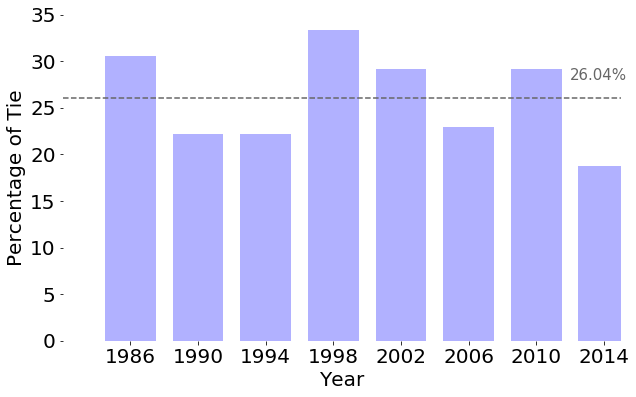

In [13]:
plt.rcParams.update({'font.size': 20})
plt.rcParams['legend.fontsize'] = 15

plt.figure(figsize=[10,6])
plt.bar(Perc_Ties_Year.index,Perc_Ties_Year['Tie']*100,width=3,color='b',alpha = 0.3)
plt.plot([1982, 2018],[Perc_Ties_Year['Tie'].mean()*100]*2,'--',color=[0.4,.4,.4])
plt.axis([1982, 2015, 0, 35])
plt.text(2012, 28, str(round(Perc_Ties_Year['Tie'].mean()*100,2))+'%',fontsize=15,color=[0.4,.4,.4])
plt.box('off')
plt.xlabel('Year')
plt.ylabel('Percentage of Tie')
plt.xticks(Perc_Ties_Year.index);
plt.savefig('Tie.jpg');

In [14]:
data_test = pd.read_excel('Scores.xlsx','2018') # testing data from 2018
Total_Games = 48 # number of games in total

Now let's create a True Table with the outcome for all the games in the testing set

In [15]:
def Outcome(data):
    if data.Wscore>data.Lscore:
        return(data.Winner)
    else:
        return 'T'

In [16]:
True_Table_Test = ([Outcome(data_test.iloc[i]) for i in range(Total_Games)])

True_Table_Test[0:5]

['Russia', 'Uruguay ', 'Iran', 'T', 'France']

### 3. Baseline guess
For each game in the test set, let's randomly guess the outcome of the game. There are 3 options: Team A winning, Team B winning or Tie. We will select each outcome with 1/3 of probability.

In [17]:
def Random_Guess(data, p):
    '''
    Receives a row of the data and guesses the outcome between 
    Team A, Team B and Tie based on a probability distribution
    '''
    Game = [data.Winner, data.Loser, 'T']
    return(np.random.choice(Game,p=p))

In [18]:
num_simulations = 1000 # simulates 1000 random guesses
p = [1/3,1/3,1/3]# [Prob Team A, Prob Team B, Prob Tie] the 3 numbers add to 1
Random_Table = [[Random_Guess(data_test.iloc[i],p) for i in range(Total_Games)] 
                for i_guess in range(num_simulations)] 

In [19]:
def Correct_Predictions(Random_Table, True_Table_Test):
    '''
    Retuns the counts of the correct predictions
    '''
    
    # row is each game (48), column is the guesses (num of simulations), value
    # is the guess (Team A, Team B or Tie) 
    Guess_Table = pd.DataFrame(Random_Table).T 
#     print(Guess_Table.head())

    # row is each game (48), column is the guesses (num of simulations), value
    # is True if guessed correctly; otherwise, False 
    TF_Table = Guess_Table == True_Table_Test # row is 
#     print(TF_Table.head())
    
    # return for each simulation the number of correct guesses
    return pd.DataFrame(TF_Table.sum())

In [20]:
Num1_Prediction = Correct_Predictions(Random_Table, True_Table_Test)
Num1_Prediction.head() # each row is a simulation with the number of correct predictions

,0
0,19
1,14
2,19
3,19
4,15


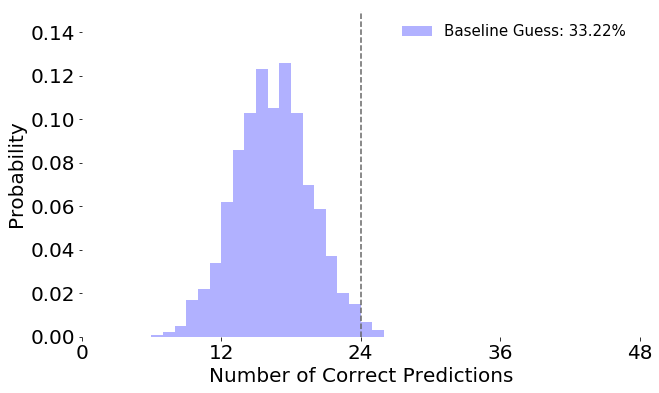

In [21]:
axis = [0,48,0,0.15]

plt.figure(figsize=[10,6])
plt.axis(axis)
plt.xlabel('Number of Correct Predictions',ma='right')
plt.ylabel('Probability',ma='right')
plt.box('off')

plt.hist(Num1_Prediction,bins = range(Total_Games+1),alpha = 0.3,color = 'blue',normed=True);
plt.legend(['Baseline Guess: ' + str(round(Num1_Prediction.mean().values[0]/Total_Games*100,2))+'%'],frameon=False)
plt.plot([24,24],[0,0.15],'--',color=[.4,.4,.4])
plt.xticks([0,12,24,36,48])
plt.savefig('1.jpg');

### 4. Bias guess
Randomly guessing an outcome makes sense if you know nothing about the data; however, what if there is a bias? For example the number of tie games occurs more or less frequently than the number of games where there is a winner? Let's explore the data.

We create a pandas dataframe that has:

The country name as row
The outcome of the First, Second and Third game as columns
We track whether they won (W), lost (L) or tied (T) a game

In [22]:
# Runs our new simulation
p = [(1-Perc_Ties_Year['Tie'].mean())/2,(1-Perc_Ties_Year['Tie'].mean())/2,Perc_Ties_Year['Tie'].mean()]# [Prob Team A, Prob Team B, Prob Tie] the 3 numbers add to 1
Random_Table = [[Random_Guess(data_test.iloc[i],p) for i in range(Total_Games)] for i_guess in range(num_simulations)] 

In [23]:
Num2_Prediction = Correct_Predictions(Random_Table, True_Table_Test)
Num2_Prediction.head()

,0
0,19
1,17
2,20
3,21
4,19


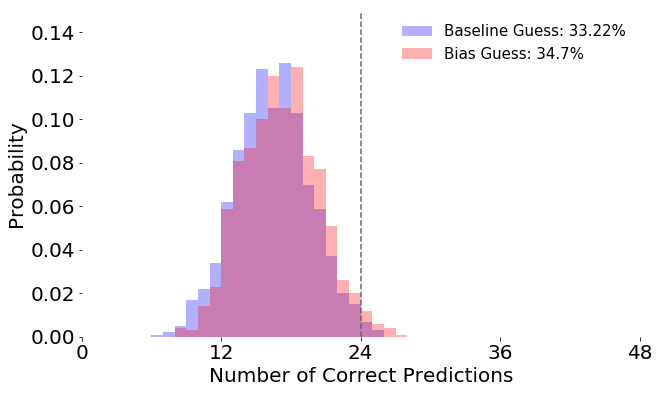

In [24]:
plt.figure(figsize=[10,6])
plt.axis(axis)
plt.xlabel('Number of Correct Predictions',ma='right')
plt.ylabel('Probability',ma='right')
plt.box('off')

plt.hist(Num1_Prediction,bins = range(Total_Games+1),alpha = 0.3,color = 'b',normed=True);
plt.hist(Num2_Prediction,bins = range(Total_Games+1),alpha = 0.3,color = 'r',normed=True);
plt.legend(['Baseline Guess: ' + str(round(Num1_Prediction.mean().values[0]/Total_Games*100,2))+'%',
    'Bias Guess: ' + str(round(Num2_Prediction.mean().values[0]/Total_Games*100,2))+'%'],frameon=False)
plt.plot([24,24],[0,0.15],'--',color=[.4,.4,.4])
plt.xticks([0,12,24,36,48])
plt.savefig('2.jpg');

### 5. NoTie Guess
We know that for a given game, it is more likely that there will be a Winner as opposed to getting a Tie. What if we now decide to ignore the Tie and always predict a Winner. How will that modify our results?

In [25]:
# Runs our new simulation
p = [0.5,0.5,0] # [Prob Team A, Prob Team B, Prob Tie] the 3 numbers add to 1
Random_Table = [[Random_Guess(data_test.iloc[i],p) for i in range(Total_Games)] for i_guess in range(num_simulations)] 

In [26]:
Num3_Prediction = Correct_Predictions(Random_Table, True_Table_Test)
Num3_Prediction.head()

,0
0,20
1,26
2,20
3,14
4,19


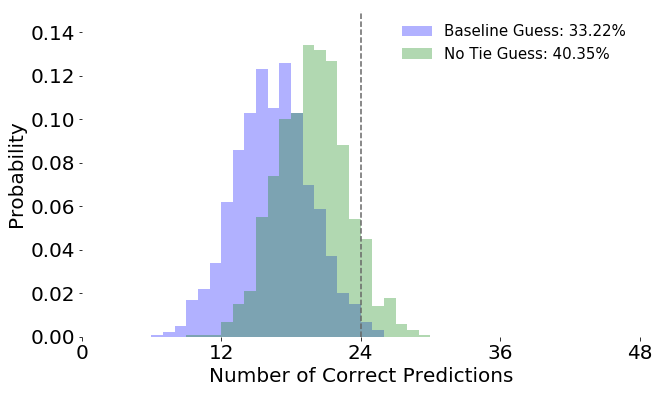

In [27]:
plt.figure(figsize=[10,6])
plt.axis(axis)
plt.xlabel('Number of Correct Predictions',ma='right')
plt.ylabel('Probability',ma='right')
plt.box('off')

plt.hist(Num1_Prediction,bins = range(Total_Games+1),alpha = 0.3,color = 'b', normed = True);
plt.hist(Num3_Prediction,bins = range(Total_Games+1),alpha = 0.3,color ='g',normed = True);
plt.legend(['Baseline Guess: ' + str(round(Num1_Prediction.mean().values[0]/Total_Games*100,2))+'%',
    'No Tie Guess: ' + str(round(Num3_Prediction.mean().values[0]/Total_Games*100,2))+'%'],frameon=False)
plt.plot([24,24],[0,0.15],'--',color=[.4,.4,.4])
plt.xticks([0,12,24,36,48])
plt.savefig('3.jpg');

In [28]:
data_train.head()

,Year,Win Goals,Lose Goals,Win Team,Lose Team,Tie
0,1986.0,1.0,1.0,BUL,ITA,True
1,1986.0,1.0,0.0,FRA,CAN,False
2,1986.0,1.0,0.0,BRA,ESP,False
3,1986.0,6.0,0.0,URS,HUN,False
4,1986.0,3.0,1.0,ARG,KOR,False


In [29]:
score = data_train[['Year','Win Goals','Lose Goals']]

In [30]:
score = score.applymap(int)
score = score.applymap(str)
score['Join Goal'] = score['Win Goals']+score['Lose Goals']

In [31]:
score.head()

,Year,Win Goals,Lose Goals,Join Goal
0,1986,1,1,11
1,1986,1,0,10
2,1986,1,0,10
3,1986,6,0,60
4,1986,3,1,31


In [32]:
score.groupby(['Year'])['Join Goal'].value_counts()

Year  Join Goal
1986  10            8
      11            7
      20            4
      21            4
      30            4
      00            3
      31            2
      22            1
      32            1
      60            1
      61            1
1990  10           10
      21            6
      11            5
      20            5
      00            3
      31            2
      41            2
      51            2
      40            1
1994  10            8
      21            6
      11            4
      20            4
      31            3
      00            2
      22            2
      30            2
      40            2
      32            1
                   ..
2006  32            1
      41            1
      42            1
      60            1
2010  10           13
      21            7
      00            6
      11            6
      20            6
      22            2
      30            2
      31            2
      32            1
      40        

In [33]:
score['Join Goal'].value_counts()

10    73
21    52
11    43
20    43
00    29
31    24
30    21
22    18
40    11
32    10
41     7
51     3
61     3
42     2
60     2
52     2
50     2
70     1
80     1
33     1
Name: Join Goal, dtype: int64

In [34]:
73/348

0.20977011494252873

In [35]:
heatmap = np.zeros((9,9))

In [36]:
for index,value in score['Join Goal'].value_counts().items():
    heatmap[int(index[1]),int(index[0])] = value # rows are loss score, columns are win score
heatmap

array([[ 29.,  73.,  43.,  21.,  11.,   2.,   2.,   1.,   1.],
       [  0.,  43.,  52.,  24.,   7.,   3.,   3.,   0.,   0.],
       [  0.,   0.,  18.,  10.,   2.,   2.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

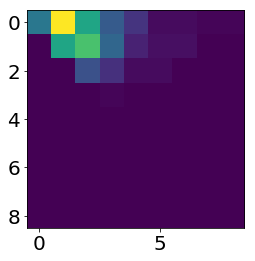

In [37]:
plt.imshow(heatmap)

In [38]:
score

,Year,Win Goals,Lose Goals,Join Goal
0,1986,1,1,11
1,1986,1,0,10
2,1986,1,0,10
3,1986,6,0,60
4,1986,3,1,31
5,1986,0,0,00
6,1986,1,1,11
7,1986,2,1,21
8,1986,1,0,10
9,1986,1,0,10


In [39]:
x = data_test[['Wscore','Lscore']]

In [40]:
x = x.applymap(int)
x = x.applymap(str)
x['Join Goal'] = x['Wscore']+x['Lscore']
x['Join Goal'].value_counts()

10    13
21    11
20     6
30     5
11     4
22     3
33     1
61     1
52     1
31     1
00     1
50     1
Name: Join Goal, dtype: int64

In [41]:
score['Join Goal'].value_counts()

10    73
21    52
11    43
20    43
00    29
31    24
30    21
22    18
40    11
32    10
41     7
51     3
61     3
42     2
60     2
52     2
50     2
70     1
80     1
33     1
Name: Join Goal, dtype: int64

In [42]:
y = (data_train['Win Goals'] + data_train['Lose Goals']).value_counts()

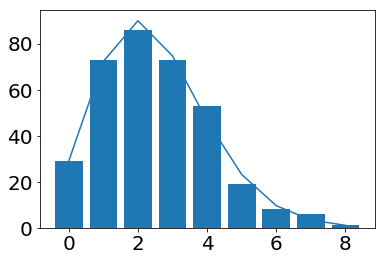

In [43]:
plt.bar(y.index,y)
fact = [np.math.factorial(i) for i in [0,1,2,3,4,5,6,7,8]]
plt.plot([0,1,2,3,4,5,6,7,8],np.exp(-2.49)*2.49**np.array([0,1,2,3,4,5,6,7,8])/fact*350)

In [44]:
np.array([1,3]).apply(np.math.factorial)

AttributeError: 'numpy.ndarray' object has no attribute 'apply'